In [523]:
import pandas as pd
import datetime 
import os
import numpy as np

# Backup

In [524]:



# linkedIn['yearstrip'] = linkedIn['Date (ISO Year Week)'].str.split(',').str[1].str.strip().str[:5]
# linkedIn['yearstrip'] = linkedIn['yearstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_year'] = linkedIn['yearstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['Date (ISO Year Week)'].str.split('(').str[1].str.strip().str[5:7]
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(')'))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: '0'+x if len(x)<2 else x)
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn = linkedIn[['model_week', 'Campaign group name', 'Total spent', 'iso_week', 'iso_year', 'model_week']].rename({'Total spent':'linkedIn_search_ad_spend', 'Campaign group name':'Country/Territory'}, axis=1)


# Code

In [525]:
folder_path = "data/usaonlyanalysis"
filenames = os.listdir(folder_path)
print(filenames)
for i in range(0, len(filenames)):
    print(filenames[i])
    print(i)

['TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv', 'Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv', '.DS_Store', 'MQL Count by Date US ONLY-weekly.csv', 'ga4_domain_data_summary - mpact.com-domain-summary.csv', 'mqlDaily-USOnly.csv', 'paid_Gifting.csv', '2025 Google Analytics Data.csv', 'GoogleSearchConsulExport-USOnly-DailyImpressions.csv', 'DEPT Initial Report - US ONLY.csv', 'MarketoData.csv', 'Impact_ Linkedin Ads Overview Report v2_NA - D_W_M_Table.csv', 'GoogleAdsWeeklyByCountry.csv', 'DirectBuy.csv', 'EventsDataAgg - usonly.csv', '2024 Google Analytics Data.csv']
TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv
0
Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv
1
.DS_Store
2
MQL Count by Date US ONLY-weekly.csv
3
ga4_domain_data_summary - mpact.com-domain-summary.csv
4
mqlDaily-USOnly.csv
5
paid_Gifting.csv
6
2025 Google Analytics Data.csv
7
GoogleSearchConsulExport-USOnly-DailyImpressions.csv
8
DEPT Initial Report - US ONLY.csv

# Raw Imports

In [526]:
podcasts_raw = pd.read_csv(folder_path + '/' + 'TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv')
linkedIn_raw = pd.read_csv(folder_path + '/' + 'Impact_ Linkedin Ads Overview Report v2_NA - D_W_M_Table.csv')
paidgifting_raw = pd.read_csv(folder_path + '/' +  'paid_Gifting.csv')
fb_raw = pd.read_csv(folder_path + '/' + 'Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv')
events_raw = pd.read_csv(folder_path + '/' + 'EventsDataAgg - usonly.csv')
mqls_raw = pd.read_csv(folder_path + '/' + 'mqlDaily-USOnly.csv')
emails_raw = pd.read_csv(folder_path + '/' + 'MarketoData.csv' )
google_search_raw = pd.read_csv(folder_path + '/' + 'GoogleSearchConsulExport-USOnly-DailyImpressions.csv')
google_ads_raw = pd.read_csv(folder_path + '/' +  'DEPT Initial Report - US ONLY.csv')
direct_raw = pd.read_csv(folder_path + '/' + 'DirectBuy.csv')
google_events_ga4_2024 = pd.read_csv(folder_path+'/'+'2024 Google Analytics Data.csv')
google_events_ga4_2025 = pd.read_csv(folder_path+'/'+'2025 Google Analytics Data.csv')


# GA4 Web Events Data

In [527]:
google_events_ga4_2025['Date'].min()
google_events_ga4_2025['Date'].max()

'Set-Cookie:crlf=injection'

In [528]:
google_web_events_ga4 = pd.concat([google_events_ga4_2025, google_events_ga4_2024], ignore_index=True)
google_web_events_ga4 = google_web_events_ga4[google_web_events_ga4['Date']!='Set-Cookie:crlf=injection']

In [529]:
google_web_events_ga4['date'] = google_web_events_ga4['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
google_web_events_ga4['iso_week'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().week)
google_web_events_ga4['iso_year'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().year)
google_web_events_ga4['weekstr'] = google_web_events_ga4['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_web_events_ga4['yearstr'] = google_web_events_ga4['iso_year'].apply(lambda x: str(x))
google_web_events_ga4['model_week_str'] = google_web_events_ga4['yearstr'] + google_web_events_ga4['weekstr']
google_web_events_ga4['model_week'] =google_web_events_ga4['model_week_str'].apply(lambda x: int(x))
google_web_events_ga4 = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'Sessions', 'Page location']].rename({'Sessions':'ga4_sessions', 'Page location':'ga4_page_path'}, axis=1)


google_web_events_ga4['path_split'] = google_web_events_ga4['ga4_page_path'].str.split('/')
google_web_events_ga4['domain'] = google_web_events_ga4['path_split'].apply(lambda x: x[2])
google_web_events_ga4['domainsub1'] = google_web_events_ga4['path_split'].apply(lambda x: x[3] if len(x)>3 else '')

## Daily All Data

In [530]:
google_daily_traffic = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

## Daily ImpactDotCom

In [531]:
impactDotComPageInclusions =  pd.read_csv(folder_path+'/'+'ga4_domain_data_summary - mpact.com-domain-summary.csv')
impactDotComPageInclusions = impactDotComPageInclusions[impactDotComPageInclusions['Include']=='Yes']

In [532]:
impactDotComPageInclusions.fillna('')
impactDotComPageInclusions

,Unnamed: 0,domainsub1,ga4_sessions,Include
0,0,NaN,3572169,Yes
1,1,partners,440737,Yes
2,2,affiliate-marketing,283069,Yes
3,3,request-a-demo-for-brands,165854,Yes
4,4,integrated-platform-prices,118149,Yes
...,...,...,...,...
70,70,find-influencers,279,Yes
72,72,onesheets,267,Yes
73,73,saasquatch,240,Yes
74,74,warc-research-report,230,Yes


In [533]:
impactDotCom_daily_ga4 = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') &(google_web_events_ga4['domainsub1'].isin(impactDotComPageInclusions['domainsub1'])) ]

In [535]:
# impactDotCom_daily_ga4[]
# impactDotCom_daily_traffic = impactDotCom_daily_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'impactDotCom_ga4_sessions'}, axis=1)

In [536]:
# impactDotCom_daily_ga4 = google_web_events_ga4[(google_web_events_ga4[''])]

## Path Analysis

In [537]:
page_path_summary = google_web_events_ga4[['ga4_page_path', 'ga4_sessions']].groupby('ga4_page_path').sum().sort_values(by='ga4_sessions', ascending=False).reset_index()
page_path_summary[page_path_summary['ga4_sessions']>800000]

,ga4_page_path,ga4_sessions
0,https://app.impact.com/login.user,13102875.0
1,https://app.impact.com/secure/mediapartner/hom...,9258248.0
2,https://impact.com/,3572169.0
3,https://app.impact.com/secure/advertiser/engag...,2789849.0
4,https://app.impact.com/secure/device/auth.ihtml,2618199.0
5,https://app.impact.com/signup/none/create-new-...,2223282.0
6,https://app.impact.com/insertionorder/partner-...,1934316.0
7,https://demo.impact.com/login.user,1446796.0
8,https://app.impact.com/secure/mediapartner/mar...,1129091.0
9,https://app.impact.com/loginError.user,1114263.0


In [538]:
page_path_summary


,ga4_page_path,ga4_sessions
0,https://app.impact.com/login.user,13102875.0
1,https://app.impact.com/secure/mediapartner/hom...,9258248.0
2,https://impact.com/,3572169.0
3,https://app.impact.com/secure/advertiser/engag...,2789849.0
4,https://app.impact.com/secure/device/auth.ihtml,2618199.0
...,...,...
22135,https://app.impact.com/secure/mediapartner/cam...,74.0
22136,https://app.impact.com/secure/mediapartner/cam...,74.0
22137,https://app.impact.com/secure/advertiser/fr/ps...,74.0
22138,https://creators.audibletrial.com/#,0.0


In [539]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')

In [540]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')
page_path_summary['domain'] = page_path_summary['path_split'].apply(lambda x: x[2])
page_path_summary['domainsub1'] = page_path_summary['path_split'].apply(lambda x: x[3] if len(x)>3 else '')
page_path_summary['domainsub2'] = page_path_summary['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
page_path_summary['domainsub3'] = page_path_summary['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
page_path_summary['domainsub4'] = page_path_summary['path_split'].apply(lambda x: x[6]if len(x)>6 else '')

In [541]:
domain_summary = page_path_summary[['domain', 'ga4_sessions']].groupby('domain').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [542]:
domain_summary.to_csv('ga4_domain_data_summary.csv')

In [543]:
page_path_summary['domain']

0                   app.impact.com
1                   app.impact.com
2                       impact.com
3                   app.impact.com
4                   app.impact.com
                   ...            
22135               app.impact.com
22136               app.impact.com
22137               app.impact.com
22138    creators.audibletrial.com
22139    creators.audibletrial.com
Name: domain, Length: 22140, dtype: object

In [544]:
impactDotComPages = page_path_summary[page_path_summary['domain']=='impact.com']

In [545]:
impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

,domainsub1,ga4_sessions
0,,3572169.0
1,partners,440737.0
2,affiliate-marketing,283069.0
3,request-a-demo-for-brands,165854.0
4,integrated-platform-prices,118149.0
...,...,...
130,?utm_source=linkedin&utm_medium=brand-organic-...,74.0
131,?_gl=xxxxxxxxxxxxxxxxxx&gclid=Cj0KCQiA-5a9BhCB...,74.0
132,impact-com-creator-influencer-marketing-platfo...,74.0
133,?utm_source=stripe.com&utm_medium=referral&utm...,74.0


In [546]:
impactDotComPagesSummary = impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [547]:
impactDotComPagesSummary.to_csv('impactDotComPagesSummary.csv')

# Google Ads

In [549]:
google_ads = google_ads_raw.copy()
google_ads = google_ads[google_ads['Account name']=='Impact Radius']
google_ads['date'] = google_ads['Day'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_ads['iso_week'] = google_ads['date'].apply(lambda x: x.isocalendar().week)
google_ads['iso_year'] = google_ads['date'].apply(lambda x: x.isocalendar().year)
google_ads['weekstr'] = google_ads['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_ads['yearstr'] = google_ads['iso_year'].apply(lambda x: str(x))
google_ads['model_week_str'] = google_ads['yearstr'] + google_ads['weekstr']
google_ads['model_week'] =google_ads['model_week_str'].apply(lambda x: int(x))
google_ads = google_ads[['model_week', 'date', 'iso_week', 'iso_year', 'Cost', 'Impr.']].rename({'Cost':'googleAds_spend', 'Impr.':'googleAds_impressions'}, axis=1)

# Podcast

In [550]:
podcasts = podcasts_raw.copy()
podcasts['date'] = podcasts['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
podcasts['iso_week'] = podcasts['date'].apply(lambda x: x.isocalendar().week)
podcasts['iso_year'] = podcasts['date'].apply(lambda x: x.isocalendar().year)
podcasts['weekstr'] = podcasts['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
podcasts['yearstr'] = podcasts['iso_year'].apply(lambda x: str(x))
podcasts['model_week_str'] = podcasts['yearstr'] + podcasts['weekstr']
podcasts['model_week'] =podcasts['model_week_str'].apply(lambda x: int(x))
podcasts = podcasts[['model_week', 'date', 'iso_week', 'iso_year', 'Downloads']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Downloads':'podcast_streams'}, axis=1).reset_index()

In [551]:
podcasts['date']

0       2022-06-03
1       2022-06-04
2       2022-06-05
3       2022-06-06
4       2022-06-07
           ...    
1094    2025-06-01
1095    2025-06-02
1096    2025-06-03
1097    2025-06-04
1098    2025-06-05
Name: date, Length: 1099, dtype: object

# LinkedIn

In [552]:
linkedIn = linkedIn_raw.copy()


In [553]:
linkedIn = linkedIn_raw.copy()
linkedIn['date'] = linkedIn['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
linkedIn['iso_week'] = linkedIn['date'].apply(lambda x: x.isocalendar().week)
linkedIn['iso_year'] = linkedIn['date'].apply(lambda x: x.isocalendar().year)
linkedIn['weekstr'] = linkedIn['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
linkedIn['yearstr'] = linkedIn['iso_year'].apply(lambda x: str(x))
linkedIn['model_week_str'] = linkedIn['yearstr'] + linkedIn['weekstr']
linkedIn['model_week'] =linkedIn['model_week_str'].apply(lambda x: int(x))
linkedIn = linkedIn[['model_week', 'date', 'iso_week', 'iso_year', 'Total spent', 'Impressions','Clicks' ]].rename({'Total spent':'linkedin_spend','Impressions':'linkedin_impressions', 'Clicks':'linkedin_clicks' }, axis=1)

# FB

In [554]:
fb_raw

,Date,Amount spent,Impressions,Link clicks,CTR (link click-through rate),CPM,CPC (link),On-Facebook leads,Cost per on-Facebook lead,Website conversions,Frequency
0,"Jun 11, 2025",712.51,38520,171,0.004439,18.497144,4.166725,11,64.773636,53,NaN
1,"Jun 10, 2025",2294.01,143786,680,0.004729,15.954335,3.373544,58,39.551897,237,NaN
2,"Jun 9, 2025",2274.63,143534,719,0.005009,15.847325,3.163602,49,46.421020,272,NaN
3,"Jun 8, 2025",2374.80,147653,759,0.005140,16.083656,3.128854,52,45.669231,243,NaN
4,"Jun 7, 2025",2265.68,142247,766,0.005385,15.927788,2.957807,51,44.425098,258,NaN
...,...,...,...,...,...,...,...,...,...,...,...
855,"Jan 7, 2023",1041.89,54117,295,0.005451,19.252545,3.531831,20,52.094500,31,NaN
856,"Jan 6, 2023",1052.34,58945,307,0.005208,17.852914,3.427818,14,75.167143,37,NaN
857,"Jan 5, 2023",1047.54,55214,303,0.005488,18.972362,3.457228,12,87.295000,43,NaN
858,"Jan 4, 2023",1048.24,49117,283,0.005762,21.341694,3.704028,20,52.412000,32,NaN


In [555]:
fb = fb_raw.copy()
fb['date'] = fb['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
fb['iso_week'] = fb['date'].apply(lambda x: x.isocalendar().week)
fb['iso_year'] = fb['date'].apply(lambda x: x.isocalendar().year)
fb['weekstr'] = fb['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
fb['yearstr'] = fb['iso_year'].apply(lambda x: str(x))
fb['model_week_str'] = fb['yearstr'] + fb['weekstr']
fb['model_week'] =fb['model_week_str'].apply(lambda x: int(x))
fb = fb[['model_week', 'date', 'iso_week', 'iso_year', 'Amount spent', 'Impressions','Link clicks' ]].rename({'Amount spent':'fb_spend','Impressions':'fb_impressions', 'Link clicks':'fb_clicks' }, axis=1)


In [556]:
fb

,model_week,date,iso_week,iso_year,fb_spend,fb_impressions,fb_clicks
0,202524,2025-06-11,24,2025,712.51,38520,171
1,202524,2025-06-10,24,2025,2294.01,143786,680
2,202524,2025-06-09,24,2025,2274.63,143534,719
3,202523,2025-06-08,23,2025,2374.80,147653,759
4,202523,2025-06-07,23,2025,2265.68,142247,766
...,...,...,...,...,...,...,...
855,202301,2023-01-07,1,2023,1041.89,54117,295
856,202301,2023-01-06,1,2023,1052.34,58945,307
857,202301,2023-01-05,1,2023,1047.54,55214,303
858,202301,2023-01-04,1,2023,1048.24,49117,283


# Google Search

In [557]:
google_search = google_search_raw.copy() 

In [493]:
google_search

,model_week,date,iso_week,iso_year,gSearch_sessions,gSearch_impressions
0,202523,2025-06-04,23,2025,1302,95609
1,202523,2025-06-03,23,2025,1439,89275
2,202523,2025-06-02,23,2025,1332,96166
3,202522,2025-06-01,22,2025,469,70008
4,202522,2025-05-31,22,2025,437,68313
...,...,...,...,...,...,...
481,202406,2024-02-09,6,2024,1177,30566
482,202406,2024-02-08,6,2024,1272,33018
483,202406,2024-02-07,6,2024,1444,34593
484,202406,2024-02-06,6,2024,1559,37451


In [374]:
google_search['date'] = google_search['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_search['iso_week'] = google_search['date'].apply(lambda x: x.isocalendar().week)
google_search['iso_year'] = google_search['date'].apply(lambda x: x.isocalendar().year)
google_search['weekstr'] = google_search['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_search['yearstr'] = google_search['iso_year'].apply(lambda x: str(x))
google_search['model_week_str'] = google_search['yearstr'] + google_search['weekstr']
google_search['model_week'] =google_search['model_week_str'].apply(lambda x: int(x))
google_search = google_search[['model_week', 'date', 'iso_week', 'iso_year', 'Clicks', 'Impressions']].rename({'Clicks':'gSearch_sessions', 'Impressions':'gSearch_impressions'}, axis=1)

In [375]:
google_search

,model_week,date,iso_week,iso_year,gSearch_sessions,gSearch_impressions
0,202523,2025-06-04,23,2025,1302,95609
1,202523,2025-06-03,23,2025,1439,89275
2,202523,2025-06-02,23,2025,1332,96166
3,202522,2025-06-01,22,2025,469,70008
4,202522,2025-05-31,22,2025,437,68313
...,...,...,...,...,...,...
481,202406,2024-02-09,6,2024,1177,30566
482,202406,2024-02-08,6,2024,1272,33018
483,202406,2024-02-07,6,2024,1444,34593
484,202406,2024-02-06,6,2024,1559,37451


# Paid Gifting

In [377]:
paidgifting = paidgifting_raw.dropna().copy()
paidgifting['date']= paidgifting['gift_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
paidgifting['iso_week'] = paidgifting['date'].apply(lambda x: x.isocalendar().week)
paidgifting['iso_year'] = paidgifting['date'].apply(lambda x: x.isocalendar().year)
paidgifting['weekstr'] = paidgifting['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
paidgifting['yearstr'] = paidgifting['iso_year'].apply(lambda x: str(x))
paidgifting['model_week_str'] = paidgifting['yearstr'] + paidgifting['weekstr']
paidgifting['model_week'] =paidgifting['model_week_str'].apply(lambda x: int(x))
paidgifting = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_cost']].rename({'gift_cost':'gift_spend'}, axis=1)
paidgifting_daily = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_spend']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

# MQLs

In [378]:
mqls_raw['date'].dtype

dtype('O')

In [379]:
mqls = mqls_raw.copy()
mqls['date']= mqls['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
mqls['iso_week'] = mqls['date'].apply(lambda x: x.isocalendar().week)
mqls['iso_year'] = mqls['date'].apply(lambda x: x.isocalendar().year)
mqls['weekstr'] = mqls['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
mqls['yearstr'] = mqls['iso_year'].apply(lambda x: str(x))
mqls['model_week_str'] = mqls['yearstr'] + mqls['weekstr']
mqls['model_week'] =mqls['model_week_str'].apply(lambda x: int(x))
mqls= mqls[['model_week', 'iso_week', 'iso_year', 'date', 'mql_count']]


In [491]:
mqls[mqls['mql_count']>300]

,model_week,iso_week,iso_year,date,mql_count
111,202517,17,2025,2025-04-22,1743
564,202442,42,2024,2024-10-15,340
722,202320,20,2023,2023-05-16,417
998,202142,42,2021,2021-10-21,677
1001,202150,50,2021,2021-12-14,627
1885,202346,46,2023,2023-11-16,510
1913,202340,40,2023,2023-10-02,486


In [492]:
mqls['mql_count'].mean()

np.float64(30.479581836001305)

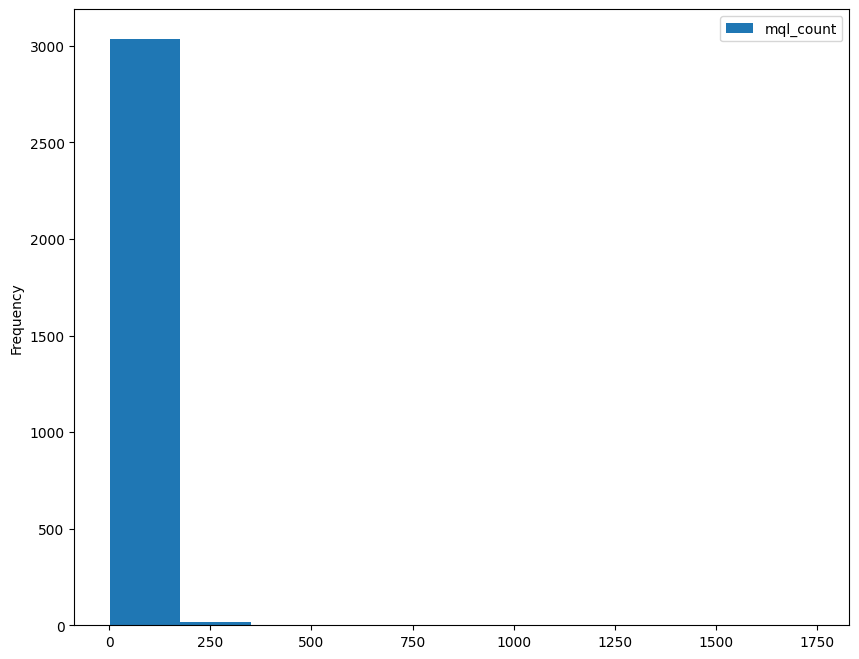

In [487]:
ax = mqls.plot.hist(column=["mql_count"], figsize=(10, 8))

# Emails

In [380]:
emails = emails_raw.copy()
emails['date'] = emails['First Activity (PDT)'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y %I:%M %p").date())
emails['iso_week'] = emails['date'].apply(lambda x: x.isocalendar().week)
emails['iso_year'] = emails['date'].apply(lambda x: x.isocalendar().year)
emails['weekstr'] = emails['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
emails['yearstr'] = emails['iso_year'].apply(lambda x: str(x))
emails['model_week_str'] = emails['yearstr'] + emails['weekstr']
emails['model_week'] =emails['model_week_str'].apply(lambda x: int(x))
emails = emails[['model_week', 'date', 'iso_week', 'iso_year', 'Sent', 'Delivered','Opened' ]].rename({'Sent':'email_sent_cnt','Delivered':'email_delivered_cnt', 'Opened':'email_opened_cnt' }, axis=1)
for var in ['email_sent_cnt', 'email_delivered_cnt','email_opened_cnt']:
    print(var)
    emails[var]=emails[var].apply(lambda x: int(x.replace(",", "")))
emails_daily = emails[['model_week', 'date', 'iso_week', 'iso_year', 'email_opened_cnt']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

email_sent_cnt
email_delivered_cnt
email_opened_cnt


In [381]:
emails_daily

,model_week,date,iso_week,iso_year,email_opened_cnt
0,202323,2023-06-06,23,2023,3315
1,202323,2023-06-07,23,2023,304697
2,202323,2023-06-08,23,2023,13676
3,202324,2023-06-12,24,2023,369
4,202324,2023-06-13,24,2023,8631
...,...,...,...,...,...
292,202521,2025-05-20,21,2025,302
293,202522,2025-05-27,22,2025,376
294,202523,2025-06-02,23,2025,997
295,202523,2025-06-05,23,2025,425


# Direct

In [382]:
direct_raw

,Status,QTR,Vertical,Month,TYPE,Launch date,Vendor,Publication (see Audience breakdown tab for details),Channel,Cost,Cost_MMM,Date_ MMM
0,Complete,Q1,Marketing,March,Lead gen campaign,3/3/2025,Morning Brew,Marketing Brew,Newsletter,NaN,$1.00,3/3/2025
1,Complete,Q1,Marketing,March,Lead gen campaign,2/15/2025,PharosIQ,PharosIS,Lead gen,"$200,000.00","$200,000.00",2/15/2025
2,Complete,Q1,Finserv,March,Lead gen campaign,3/10/2025,Industry dive,Banking Dive,Newsletter,"$7,000.00","$7,000.00",3/10/2025
3,Complete,Q1,Retail,March,Lead gen campaign,3/18/2025,Industry dive,Retail Dive,Eblast,"$8,000.00","$8,000.00",3/18/2025
4,Complete,Q1,Marketing,March,Lead gen campaign,3/18/2025,Workweek,Marketing Millenials,Newsletter ad,"$11,711.00","$11,711.00",3/18/2025
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,Q1,General,March,NaN,"3/8 , 3/12",Growth Hackers Daily,Growth Hackers Daily,"8 ads $6,000 (1 takeover, 2 primaries, and 5 s...","$6,000.00","$3,000.00",03/12/2023
176,NaN,Q1,General,March,NaN,3/9/2023,Industry Dive,Marketing Dive Email Blast,Eblast,"$12,000.00","$12,000.00",3/9/2023
177,NaN,Q1,Creator,March,NaN,3/9/2023,Industry Dive,Social media dive,Newsletter,"$12,500.00","$12,500.00",3/9/2023
178,NaN,Q1,Retail,March,NaN,3/9/2023,Industry Dive,Retail Dive Email Blast,Eblast,"$10,500.00","$10,500.00",3/9/2023


In [398]:
direct['Cost_MMM'].dtype

dtype('O')

In [400]:
direct['Cost_MMM']

0            $1.00
1      $200,000.00
2        $7,000.00
3        $8,000.00
4       $11,711.00
          ...     
175      $3,000.00
176     $12,000.00
177     $12,500.00
178     $10,500.00
179              1
Name: Cost_MMM, Length: 180, dtype: object

In [412]:
direct= direct_raw.copy()
direct['date']= direct['Date_ MMM'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())


direct['iso_week'] = direct['date'].apply(lambda x: x.isocalendar().week)
direct['iso_year'] = direct['date'].apply(lambda x: x.isocalendar().year)
direct['weekstr'] = direct['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
direct['yearstr'] = direct['iso_year'].apply(lambda x: str(x))
direct['model_week_str'] = direct['yearstr'] + direct['weekstr']
direct['model_week'] =direct['model_week_str'].apply(lambda x: int(x))
direct['Cost_MMM'] = direct['Cost_MMM'].apply(lambda x: float(x.replace(',','').replace('$','')) if type(x)!=float else x)
direct = direct[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend'}, axis=1)


# Events

In [427]:
events = events_raw[events_raw['Region']=='NAM']
events = events[events['Event Actual Cost - Pls input in SF campaign'].isnull()==False]
events['date']= events['Event Start Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())
events['iso_week'] = events['date'].apply(lambda x: x.isocalendar().week)
events['iso_year'] = events['date'].apply(lambda x: x.isocalendar().year)
events['weekstr'] = events['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
events['yearstr'] = events['iso_year'].apply(lambda x: str(x))
events['model_week_str'] = events['yearstr'] + events['weekstr']
events['model_week'] =events['model_week_str'].apply(lambda x: int(x))
events = events[['model_week', 'date', 'iso_week', 'iso_year', 'Event Actual Cost - Pls input in SF campaign']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Event Actual Cost - Pls input in SF campaign':'event_spend'}, axis=1).reset_index()


In [426]:
events

event_spend
model_week date       iso_week iso_year             
202304     2023-01-23 4        2023          18298.0
202309     2023-02-28 9        2023          69279.0
202313     2023-03-27 13       2023          66790.0
           2023-04-02 13       2023          40918.0
202314     2023-04-04 14       2023          29270.0
202318     2023-05-04 18       2023          45043.0
202324     2023-06-13 24       2023         916994.0
202325     2023-06-20 25       2023          16500.0
202331     2023-07-31 31       2023          26351.0
202337     2023-09-11 37       2023          65465.0
           2023-09-13 37       2023          18439.0
202338     2023-09-18 38       2023           5617.0
202340     2023-10-03 40       2023          13814.0
202344     2023-11-02 44       2023          28623.0
202403     2024-01-15 3        2024          24964.0
           2024-01-16 3        2024         127875.0
202409     2024-02-26 9        2024          65246.0
202416     2024-04-16 16       2024          25720.0
202419     2024-05-08 19       2024          17744.0
202423     2024-06-04 23       2024           6250.0
202431     2024-07-29 31       2024          17744.0
202441     2024-10-09 41       2024          36289.0
202444     2024-10-28 44       2024          21057.0
202447     2024-11-19 47       2024           7000.0
202506     2025-02-03 6        2025          32676.0
           2025-02-04 6        2025         103919.0
202513     2025-03-26 13       2025           6421.0
202517     2025-04-22 17       2025          18306.0
202541     2025-10-06 41       2025              0.0

# Combined DF

In [429]:
combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, events, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape


(426, 21)

In [430]:
combined

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,gift_spend,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count
0,202415,2024-04-11,15,2024,209194.0,332.0,11063.50,186008,1265,1324.0,...,NaN,NaN,9000.0,2169.57,112790.0,460.0,6448.16,"9,873",NaN,61
1,202415,2024-04-12,15,2024,167947.0,227.0,10985.40,167930,1187,1127.0,...,498.86,NaN,NaN,2189.92,107564.0,472.0,4544.18,"7,438",NaN,60
2,202415,2024-04-13,15,2024,76022.0,186.0,8826.29,124526,930,504.0,...,NaN,NaN,NaN,2140.88,97362.0,468.0,1676.13,"8,682",NaN,21
3,202415,2024-04-14,15,2024,93371.0,120.0,7257.84,111431,844,519.0,...,NaN,NaN,NaN,2404.75,112847.0,570.0,2054.01,"4,673",NaN,30
4,202416,2024-04-15,16,2024,219057.0,182.0,10275.43,159627,1160,1133.0,...,339.42,NaN,NaN,2307.37,120812.0,464.0,5510.42,"8,131",NaN,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,202523,2025-06-06,23,2025,140132.0,NaN,11533.45,145690,1115,NaN,...,NaN,186.0,NaN,2143.19,131616.0,692.0,4599.39,"7,584",NaN,21
422,202523,2025-06-07,23,2025,78402.0,NaN,10198.90,111241,953,NaN,...,NaN,NaN,NaN,2265.68,142247.0,766.0,3656.27,"6,225",NaN,26
423,202523,2025-06-08,23,2025,129316.0,NaN,4765.20,44298,432,NaN,...,NaN,NaN,NaN,2374.80,147653.0,759.0,3816.07,"5,732",NaN,17
424,202524,2025-06-09,24,2025,189679.0,NaN,11931.42,172254,1210,NaN,...,NaN,NaN,NaN,2274.63,143534.0,719.0,5089.73,"9,039",NaN,113


In [431]:
# Filter for GA3 data
combined = combined[combined['date']<pd.Timestamp('2025-06-04').date()]

In [432]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 0 to 418
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_week             419 non-null    int64  
 1   date                   419 non-null    object 
 2   iso_week               419 non-null    int64  
 3   iso_year               419 non-null    int64  
 4   ga4_sessions           419 non-null    float64
 5   podcast_streams        419 non-null    float64
 6   linkedin_spend         419 non-null    float64
 7   linkedin_impressions   419 non-null    int64  
 8   linkedin_clicks        419 non-null    int64  
 9   gSearch_sessions       419 non-null    float64
 10  gSearch_impressions    419 non-null    float64
 11  gift_spend             263 non-null    float64
 12  email_opened_cnt       153 non-null    float64
 13  direct_spend           58 non-null     float64
 14  fb_spend               400 non-null    float64
 15  fb_impressi

In [433]:
convert_fields = ['googleAds_impressions']
for var in convert_fields:
    combined[var] = combined[var].fillna('0')
    combined[var] = combined[var].apply(lambda x: float(x.replace(',','').replace('$','')))
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 0 to 418
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_week             419 non-null    int64  
 1   date                   419 non-null    object 
 2   iso_week               419 non-null    int64  
 3   iso_year               419 non-null    int64  
 4   ga4_sessions           419 non-null    float64
 5   podcast_streams        419 non-null    float64
 6   linkedin_spend         419 non-null    float64
 7   linkedin_impressions   419 non-null    int64  
 8   linkedin_clicks        419 non-null    int64  
 9   gSearch_sessions       419 non-null    float64
 10  gSearch_impressions    419 non-null    float64
 11  gift_spend             263 non-null    float64
 12  email_opened_cnt       153 non-null    float64
 13  direct_spend           58 non-null     float64
 14  fb_spend               400 non-null    float64
 15  fb_impressi

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_73528/2808627417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined[var] = combined[var].fillna('0')
/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_73528/2808627417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined[var] = combined[var].apply(lambda x: float(x.replace(',','').replace('$','')))


In [ ]:
spendVars = ['gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend', 'event_spend']
for var in spendVars:
    if combined[var].dtype != float:
        print(combined[var].dtype)
        combined[var] = combined[var].apply(lambda x: x.replace(',','').replace('$',''))

In [438]:
gaSpend_missing = combined[combined['googleAds_spend'].isnull()==True]
gaSpend_missing[['date']]

,date
51,2024-06-01
52,2024-06-02
385,2025-05-01
386,2025-05-02
387,2025-05-03
388,2025-05-04


In [435]:
fb_missing = combined[combined['fb_spend'].isnull()==True]
fb_missing[['date']]

,date
191,2024-10-19
192,2024-10-20
193,2024-10-21
194,2024-10-22
195,2024-10-23
196,2024-10-24
197,2024-10-25
198,2024-10-26
199,2024-10-27
200,2024-10-28


In [439]:
spendVars = ['gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend', 'event_spend']
for var in spendVars:
    if combined[var].dtype != float:
        print(combined[var].dtype)
        combined[var] = combined[var].apply(lambda x: x.replace(',','').replace('$',''))

In [448]:
combined[combined['event_spend']>0]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,gift_spend,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count
5,202416,2024-04-16,16,2024,224572.0,151.0,10460.650000,168669,1158,1210.0,...,423.66,0.0,0.0,2164.09,105145.0,504.0,5447.02,8470.0,25720.0,52
27,202419,2024-05-08,19,2024,242263.0,499.0,14448.280000,183731,1141,1300.0,...,123.17,0.0,0.0,2956.35,201448.0,810.0,7407.86,10015.0,17744.0,85
54,202423,2024-06-04,23,2024,262643.0,4618.0,14440.410000,203812,1407,1266.0,...,463.37,66.0,9000.0,3033.01,180083.0,1064.0,6883.98,9810.0,6250.0,59
109,202431,2024-07-29,31,2024,217530.0,53.0,13139.029991,244591,1284,1264.0,...,241.18,254.0,0.0,2449.76,114597.0,750.0,6749.88,15720.0,17744.0,120
181,202441,2024-10-09,41,2024,224124.0,204.0,13807.429987,183029,1059,1176.0,...,49.14,708.0,0.0,1656.77,46939.0,279.0,6492.83,8252.0,36289.0,74
200,202444,2024-10-28,44,2024,224246.0,100.0,6746.980000,109784,774,1217.0,...,250.93,0.0,0.0,0.00,0.0,0.0,3465.12,4726.0,21057.0,36
222,202447,2024-11-19,47,2024,256537.0,422.0,8687.320000,123628,1061,1373.0,...,993.26,130.0,0.0,1794.93,50904.0,290.0,6265.78,8452.0,7000.0,43
298,202506,2025-02-03,6,2025,254928.0,36.0,14518.360000,186969,1273,1236.0,...,350.00,1164.0,0.0,1822.89,90495.0,369.0,4397.18,7095.0,32676.0,70
299,202506,2025-02-04,6,2025,259275.0,37.0,14522.430000,192742,1390,1350.0,...,1052.47,189.0,17381.0,1767.05,77220.0,347.0,5794.73,7354.0,103919.0,79
349,202513,2025-03-26,13,2025,295692.0,2739.0,8739.670000,126300,1314,1310.0,...,900.79,0.0,0.0,2142.56,93726.0,438.0,6244.26,9381.0,6421.0,55


In [447]:
naFillVars = ['fb_spend', 'gift_spend', 'fb_impressions', 'fb_clicks','googleAds_spend', 'email_opened_cnt', 'gift_spend', 'event_spend', 'direct_spend']
for var in naFillVars:
    combined[var] = combined[var].fillna(0)

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_73528/1319672358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined[var] = combined[var].fillna(0)


In [449]:
combined[['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']]

,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend
0,11063.50,0.00,9000.0,2169.57,6448.16
1,10985.40,498.86,0.0,2189.92,4544.18
2,8826.29,0.00,0.0,2140.88,1676.13
3,7257.84,0.00,0.0,2404.75,2054.01
4,10275.43,339.42,0.0,2307.37,5510.42
...,...,...,...,...,...
414,11885.61,0.00,0.0,2118.24,3638.84
415,12605.98,0.00,0.0,2210.39,2189.91
416,11975.32,0.00,0.0,2330.95,2056.70
417,9442.31,0.00,0.0,2342.44,4109.52


In [450]:
combined.loc[:, spendVars].sum()

gift_spend          103561.57
direct_spend       1304820.00
fb_spend            821950.94
googleAds_spend    1891261.12
event_spend         293126.00
dtype: float64

In [451]:
spendingSummary = combined[['iso_year','linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']].groupby('iso_year').sum().reset_index()
spendVars = ['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']
for var in spendVars:
    print(var)
    spendingSummary[var] = spendingSummary[var].apply(lambda x: '{:,.2f}'.format(x))

linkedin_spend
gift_spend
direct_spend
fb_spend
googleAds_spend


In [452]:
spendingSummary

,iso_year,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend
0,2024,"2,858,585.91","61,495.78","798,634.00","559,556.91","1,295,373.29"
1,2025,"1,699,483.81","42,065.79","506,186.00","262,394.03","595,887.83"


In [453]:
combined['date'].min()

datetime.date(2024, 4, 11)

In [454]:
combined['date'].max()

datetime.date(2025, 6, 3)

In [455]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 0 to 418
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_week             419 non-null    int64  
 1   date                   419 non-null    object 
 2   iso_week               419 non-null    int64  
 3   iso_year               419 non-null    int64  
 4   ga4_sessions           419 non-null    float64
 5   podcast_streams        419 non-null    float64
 6   linkedin_spend         419 non-null    float64
 7   linkedin_impressions   419 non-null    int64  
 8   linkedin_clicks        419 non-null    int64  
 9   gSearch_sessions       419 non-null    float64
 10  gSearch_impressions    419 non-null    float64
 11  gift_spend             419 non-null    float64
 12  email_opened_cnt       419 non-null    float64
 13  direct_spend           419 non-null    float64
 14  fb_spend               419 non-null    float64
 15  fb_impressi

In [456]:
combined.to_csv('mmm_data.csv')

# Historical Data

In [ ]:
combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape


In [457]:
minCase = google_ads['date'].min()
maxCase = google_ads['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2011-10-13 and the max date is 2025-06-10


In [458]:
google_ads[:5]

,model_week,date,iso_week,iso_year,googleAds_spend,googleAds_impressions
0,201141,2011-10-13,41,2011,0.00,0
1,201142,2011-10-18,42,2011,580.00,"276,820"
2,201142,2011-10-19,42,2011,537.27,"324,325"
3,201142,2011-10-20,42,2011,645.76,"330,915"
4,201142,2011-10-21,42,2011,95.77,"3,520"


In [459]:
minCase = fb['date'].min()
maxCase = fb['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2023-01-03 and the max date is 2025-06-11


In [460]:
minCase = linkedIn['date'].min()
maxCase = linkedIn['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2022-01-01 and the max date is 2025-06-11


# Query Volume

In [461]:
queries =  pd.read_csv("data/preliminaryCSVs/UnbrandedQueryVolume - Weekly- Gene.csv")

In [462]:
queries.columns

Index(['Keyword', 'Currency', 'Avg. monthly searches', 'Three month change',
       'YoY change', 'Competition', 'Competition (indexed value)',
       'Top of page bid (low range)', 'Top of page bid (high range)',
       'Ad impression share', 'Organic impression share',
       'Organic average position', 'In account?', 'In plan?',
       'Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'S

In [463]:
combined['date'].unique()

array([datetime.date(2024, 4, 11), datetime.date(2024, 4, 12),
       datetime.date(2024, 4, 13), datetime.date(2024, 4, 14),
       datetime.date(2024, 4, 15), datetime.date(2024, 4, 16),
       datetime.date(2024, 4, 17), datetime.date(2024, 4, 18),
       datetime.date(2024, 4, 19), datetime.date(2024, 4, 20),
       datetime.date(2024, 4, 21), datetime.date(2024, 4, 22),
       datetime.date(2024, 4, 23), datetime.date(2024, 4, 24),
       datetime.date(2024, 4, 25), datetime.date(2024, 4, 26),
       datetime.date(2024, 4, 27), datetime.date(2024, 4, 28),
       datetime.date(2024, 4, 29), datetime.date(2024, 4, 30),
       datetime.date(2024, 5, 1), datetime.date(2024, 5, 2),
       datetime.date(2024, 5, 3), datetime.date(2024, 5, 4),
       datetime.date(2024, 5, 5), datetime.date(2024, 5, 6),
       datetime.date(2024, 5, 7), datetime.date(2024, 5, 8),
       datetime.date(2024, 5, 9), datetime.date(2024, 5, 10),
       datetime.date(2024, 5, 11), datetime.date(2024, 5, 12),
 

In [464]:
combined['month'] = combined['date'].apply(lambda x: x.month)

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_73528/3802247674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['month'] = combined['date'].apply(lambda x: x.month)


In [465]:
combined['month']

0      4
1      4
2      4
3      4
4      4
      ..
414    5
415    5
416    6
417    6
418    6
Name: month, Length: 419, dtype: int64

In [466]:
queries

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Jul 2024,Searches: Aug 2024,Searches: Sep 2024,Searches: Oct 2024,Searches: Nov 2024,Searches: Dec 2024,Searches: Jan 2025,Searches: Feb 2025,Searches: Mar 2025,Searches: Apr 2025
0,affiliate programs,USD,14800,22%,0%,Medium,58.0,1.16,6.23,8%,...,18100,14800,14800,12100,12100,12100,18100,12100,14800,14800
1,walmart affiliate program,USD,9900,22%,-18%,Low,24.0,0.86,1.06,NaN,...,14800,9900,18100,14800,9900,8100,8100,8100,6600,9900
2,multi touch attribution,USD,1300,23%,23%,Medium,38.0,11.66,29.36,NaN,...,1000,1000,1000,1300,1300,1000,1300,1300,1600,1600
3,affiliate networks,USD,2900,-19%,52%,Low,21.0,3.53,18.28,13%,...,2400,1900,1900,2400,2400,2400,2900,5400,9900,4400
4,referral software,USD,320,50%,22%,Low,28.0,11.94,38.04,38%,...,260,260,260,260,320,260,320,260,390,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,the attribution model,USD,10,0%,0%,Low,14.0,NaN,NaN,NaN,...,10,0,0,10,10,10,10,10,10,10
432,touch attribution,USD,20,-33%,100%,Low,11.0,NaN,NaN,NaN,...,10,10,10,20,20,30,20,30,10,20
433,use a pie chart,USD,30,400%,-29%,Low,0.0,NaN,NaN,NaN,...,30,10,10,40,50,10,10,10,30,50
434,voucher marketing,USD,10,0%,0%,Low,20.0,NaN,NaN,NaN,...,40,10,10,10,10,10,10,10,10,10


In [467]:
queryMonthlyDF = queries[['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']].sum().reset_index().rename({'index':'month_text', 0:'query_volume'}, axis=1)

In [468]:
queryMonthlyDF.columns


Index(['month_text', 'query_volume'], dtype='object')

In [469]:
import calendar


#datetime_object = datetime.datetime.strptime(month_abbr, "%b")

def days_in_month(year, month):
  """Returns the number of days in a given month of a given year."""
  return calendar.monthrange(year, month)[1]

In [470]:
date_columns = ['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']

In [471]:
queryMonthlyDF['month_str'] = queryMonthlyDF['month_text'].apply(lambda x: datetime.datetime.strptime(x[10:13], "%b").month)
queryMonthlyDF['year_str'] = queryMonthlyDF['month_text'].apply(lambda x: int(x[14:18]))
queryMonthlyDF['days_in_month'] = queryMonthlyDF.apply(lambda row: days_in_month(row['year_str'], row['month_str']), axis=1)


In [472]:
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['query_volume']/queryMonthlyDF['days_in_month']
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['daily_avg_queries'].apply(lambda x: int(x))

In [473]:
queryMonthlyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month_text         48 non-null     object
 1   query_volume       48 non-null     int64 
 2   month_str          48 non-null     int64 
 3   year_str           48 non-null     int64 
 4   days_in_month      48 non-null     int64 
 5   daily_avg_queries  48 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


In [474]:
queryMonthlyDF = queryMonthlyDF[['year_str', 'month_str', 'daily_avg_queries']].rename({'month_str':'month', 'year_str':'iso_year'},axis=1)

# Add Query VOlume

In [475]:
combined['month'] = combined['date'].apply(lambda x: x.month)

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_73528/3802247674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['month'] = combined['date'].apply(lambda x: x.month)


In [476]:
combined = pd.merge(combined, queryMonthlyDF, on=['month', 'iso_year'], how='left')

In [477]:
combined[['model_week', 'date']].groupby(['model_week', 'date']).count().reset_index()

,model_week,date
0,202415,2024-04-11
1,202415,2024-04-12
2,202415,2024-04-13
3,202415,2024-04-14
4,202416,2024-04-15
...,...,...
414,202522,2025-05-30
415,202522,2025-05-31
416,202522,2025-06-01
417,202523,2025-06-02


In [478]:
train_small = combined[combined['date']<=pd.Timestamp('2024-10-11').date()]
test_small = combined[(combined['date']>pd.Timestamp('2024-10-11').date()) & (combined['date']<pd.Timestamp('2024-12-11').date())]

In [479]:
train_small

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,month,daily_avg_queries
0,202415,2024-04-11,15,2024,209194.0,332.0,11063.500000,186008,1265,1324.0,...,9000.0,2169.57,112790.0,460.0,6448.16,9873.0,0.0,61,4,24779.0
1,202415,2024-04-12,15,2024,167947.0,227.0,10985.400000,167930,1187,1127.0,...,0.0,2189.92,107564.0,472.0,4544.18,7438.0,0.0,60,4,24779.0
2,202415,2024-04-13,15,2024,76022.0,186.0,8826.290000,124526,930,504.0,...,0.0,2140.88,97362.0,468.0,1676.13,8682.0,0.0,21,4,24779.0
3,202415,2024-04-14,15,2024,93371.0,120.0,7257.840000,111431,844,519.0,...,0.0,2404.75,112847.0,570.0,2054.01,4673.0,0.0,30,4,24779.0
4,202416,2024-04-15,16,2024,219057.0,182.0,10275.430000,159627,1160,1133.0,...,0.0,2307.37,120812.0,464.0,5510.42,8131.0,0.0,116,4,24779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,202441,2024-10-07,41,2024,242391.0,287.0,14586.519979,198788,1121,1262.0,...,0.0,1801.88,60099.0,254.0,7713.02,8243.0,0.0,52,10,18677.0
180,202441,2024-10-08,41,2024,236612.0,253.0,14509.679980,199314,1138,1312.0,...,0.0,1750.12,48267.0,243.0,6724.63,8472.0,0.0,39,10,18677.0
181,202441,2024-10-09,41,2024,224124.0,204.0,13807.429987,183029,1059,1176.0,...,0.0,1656.77,46939.0,279.0,6492.83,8252.0,36289.0,74,10,18677.0
182,202441,2024-10-10,41,2024,197979.0,183.0,12672.849993,190614,1089,1108.0,...,10333.0,1675.25,47911.0,247.0,6564.23,8521.0,0.0,53,10,18677.0


In [480]:
train_small.to_csv('mmm_train_small.csv')
test_small.to_csv('mmm_test_small.csv')

In [481]:
train_small.shape

(184, 23)

In [482]:
len(['ga4_sessions',
 'podcast_streams',
 'linkedin_spend',
 'linkedin_impressions',
 'linkedin_clicks',
 'gSearch_sessions',
 'gSearch_impressions',
 'gift_spend',
 'email_opened_cnt',
 'direct_spend',
 'fb_spend',
 'fb_impressions',
 'fb_clicks',
 'googleAds_spend',
 'googleAds_impressions',
 'daily_avg_queries'])

16

In [483]:
train_all = combined[combined['date']<=pd.Timestamp('2025-03-11').date()]
test_all = combined[combined['date']>pd.Timestamp('2025-03-11').date()]

In [484]:
test_all

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,month,daily_avg_queries
335,202511,2025-03-12,11,2025,300243.0,348.0,13204.33,179760,1492,1418.0,...,0.0,1737.08,83002.0,387.0,5874.09,8759.0,0.0,40,3,20764.0
336,202511,2025-03-13,11,2025,273904.0,244.0,12500.21,176581,1632,1316.0,...,0.0,1773.83,85758.0,351.0,4672.17,7544.0,0.0,269,3,20764.0
337,202511,2025-03-14,11,2025,205156.0,142.0,11772.03,173769,1431,1079.0,...,0.0,1723.59,87237.0,384.0,3762.00,6905.0,0.0,44,3,20764.0
338,202511,2025-03-15,11,2025,105544.0,142.0,9236.31,129076,1116,504.0,...,50000.0,1758.04,91060.0,429.0,2085.16,4773.0,0.0,23,3,20764.0
339,202511,2025-03-16,11,2025,183739.0,92.0,8036.11,109828,973,608.0,...,0.0,1858.44,107693.0,455.0,2621.16,5374.0,0.0,22,3,20764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,202522,2025-05-30,22,2025,176320.0,306.0,11885.61,96654,740,1047.0,...,0.0,2118.24,130344.0,556.0,3638.84,5802.0,0.0,256,5,NaN
415,202522,2025-05-31,22,2025,92637.0,286.0,12605.98,100465,848,437.0,...,0.0,2210.39,138495.0,655.0,2189.91,3444.0,0.0,25,5,NaN
416,202522,2025-06-01,22,2025,126245.0,196.0,11975.32,102605,851,469.0,...,0.0,2330.95,163070.0,766.0,2056.70,4136.0,0.0,17,6,NaN
417,202523,2025-06-02,23,2025,210271.0,240.0,9442.31,124689,802,1332.0,...,0.0,2342.44,143800.0,654.0,4109.52,7334.0,0.0,34,6,NaN


In [485]:
train_all.to_csv('mmm_train_all.csv')
test_all.to_csv('mmm_test_all.csv')